# Introduction

In this notebook, we will train a neural network using Tensorflow to classify animal images.
[Reference](https://www.tensorflow.org/tutorials/keras/classification)

We will be using the Animal data in this notebook
[dataset](https://www.kaggle.com/datasets/ashishsaxena2209/animal-image-datasetdog-cat-and-panda)

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import tensorflow as tf
import numpy as np
# import cv2
import matplotlib.pyplot as plt
import pandas as pd
#handles various images operations
#Instantly make your loops show a smart progress meter
from tqdm import tqdm
import random

# Load the labels

In [3]:
animals_dataset = ["cats","dogs","panda"]

# Load the Data

In [4]:
# from sklearn.model_selection import train_test_split

# IMG_SIZE = 60 # different shapes (landscape, potraite) are normalized
# # method to load train a
# def create_training_test_dataset():
    
#     DATADIR = "data/animals/animals/"
#     data = []
#     training_set = []
#     testing_set = []
    
#     for category in tqdm(animals_dataset):  # do dogs and cats
#         if data:
#             train , test = train_test_split(data,test_size=0.1)
#             training_set.extend(train)
#             testing_set.extend(test)
#             data = []
#         path = os.path.join(DATADIR, category)  # create path to the animals
#         class_num = animals_dataset.index(category)  # get the classification  (0 to 90).

#         for img in os.listdir(path):  # iterate over each image 
#             try:
#                 img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
#                 new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
#                 data.append([new_array, class_num])  # add this to our training_data
#             except Exception as e:  # in the interest in keeping the output clean...
#                 pass
#     return training_set, testing_set

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def to_grayscale(image):
    image = tf.image.rgb_to_grayscale(image)
    return image

batch_size= 32
data_dir = "data/animals/"
img_height = 224
img_width = 224
# Rescaling the input image as well as Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
    preprocessing_function=to_grayscale,
    validation_split=0.1) # set validation split

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes = animals_dataset,
    subset='training',
    shuffle=True) # set as training data

validation_generator = train_datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes = animals_dataset,
    subset='validation',
    shuffle=True) # set as validation data

Found 2700 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


# Visualising samples from training set

In [6]:
training_samples, labels = train_generator.next()

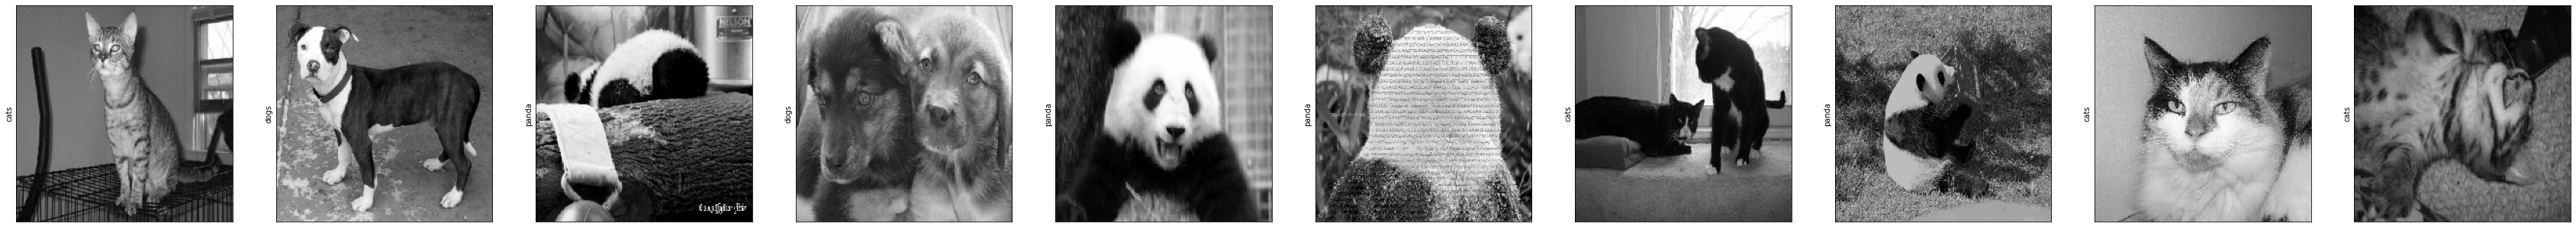

In [7]:
plt.figure(figsize=(60, 60))

for i in range(10):
    plt.subplot(5, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    image = training_samples[i]
    plt.imshow(image, cmap=plt.cm.binary)
    label = int(np.argmax(labels[i]))
    plt.ylabel(animals_dataset[label])
plt.show()

# Building the model

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.callbacks import TensorBoard
import time
from tensorflow.keras.optimizers import Adam

kernel_size = (3,3)
pool_size = (2,2)
first_filters = 32
second_filters = 64
third_filtesr = 128

dropout_conv = 0.3
dropout_dense = 0.3
IMAGE_SIZE = 224
model = Sequential()
model.add(Conv2D(first_filters,kernel_size,activation='relu',input_shape = (IMAGE_SIZE,IMAGE_SIZE,3))) #This 3, would be a 1 if the images are gray
model.add(Conv2D(first_filters,kernel_size,activation='relu'))
model.add(Conv2D(first_filters,kernel_size,activation='relu'))
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters,kernel_size,activation='relu'))
model.add(Conv2D(second_filters,kernel_size,activation='relu'))
model.add(Conv2D(second_filters,kernel_size,activation='relu'))
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filtesr,kernel_size,activation='relu'))
model.add(Conv2D(third_filtesr,kernel_size,activation='relu'))
model.add(Conv2D(third_filtesr,kernel_size,activation='relu'))
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(dropout_dense))
model.add(Dense(3, activation='softmax'))

model.compile(Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 109, 109, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 107, 107, 64)      18496     
                                                        

* **Flatten layer** converts the 2D array to a 1D array (28 x 28 = 784 dimensions)
* **Dense layer** deeply connects with its preceding layer, i.e. all neurons of the layer are connected to every neuron of its preceding layer. Neurons in the deep layer receiv output from every neuron of its preceding layer, where neurons of the dense layer perform matrix-vector multiplication.
* One Dense layer with **128 nodes**
* One Dense layer with **10 nodes** which returns an array of length 10. Each node contains a score indicating the current images' probability of belong to each of the classes 

In [17]:
model.fit(train_generator,
          epochs=10,
          verbose=2,
          validation_data=validation_generator)

Epoch 1/10
85/85 - 443s - loss: 0.9971 - accuracy: 0.4800 - val_loss: 0.8886 - val_accuracy: 0.5433 - 443s/epoch - 5s/step
Epoch 2/10
85/85 - 446s - loss: 0.7822 - accuracy: 0.5885 - val_loss: 0.7986 - val_accuracy: 0.6067 - 446s/epoch - 5s/step
Epoch 3/10
85/85 - 457s - loss: 0.7359 - accuracy: 0.6111 - val_loss: 0.7689 - val_accuracy: 0.6200 - 457s/epoch - 5s/step
Epoch 4/10
85/85 - 455s - loss: 0.6955 - accuracy: 0.6422 - val_loss: 0.7236 - val_accuracy: 0.6033 - 455s/epoch - 5s/step
Epoch 5/10
85/85 - 464s - loss: 0.6465 - accuracy: 0.6763 - val_loss: 0.7275 - val_accuracy: 0.6333 - 464s/epoch - 5s/step
Epoch 6/10
85/85 - 461s - loss: 0.6019 - accuracy: 0.7152 - val_loss: 0.7356 - val_accuracy: 0.6067 - 461s/epoch - 5s/step
Epoch 7/10
85/85 - 456s - loss: 0.5500 - accuracy: 0.7422 - val_loss: 0.7124 - val_accuracy: 0.6733 - 456s/epoch - 5s/step
Epoch 8/10
85/85 - 512s - loss: 0.4854 - accuracy: 0.7678 - val_loss: 0.7866 - val_accuracy: 0.6667 - 512s/epoch - 6s/step
Epoch 9/10
85/85

## Evaluate

In [18]:
# import pickle

# pickle_in = open("X_TEST.pickle","rb")
# test_images_init = pickle.load(pickle_in)
# test_images = test_images_init/255.0

# pickle_in = open("y_test_label.pickle","rb")
# test_labels = pickle.load(pickle_in)


In [21]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Validation Loss: {}, Validation Accuracy: {}".format(test_loss, test_accuracy))

10/10 [==============================] - 9s 878ms/step - loss: 0.8173 - accuracy: 0.6767
Validation Loss: 0.8173004388809204, Validation Accuracy: 0.6766666769981384
